# Preprocessing of the original dataset

In [1]:
import tarfile
import os
import numpy as np

In [3]:
with tarfile.open('./datasets/reconstruction/arq_dataset.tar.gz') as file:
    file.extractall('./datasets/reconstruction/')
    file.close()
dataset = np.load('./datasets/reconstruction/custom_arq_dataset.npy', allow_pickle=True).item()
os.remove('./datasets/reconstruction/custom_arq_dataset.npy')

In [4]:
mask_tr = np.array(dataset['train']['labels']) == 'arq'
mask_ts = np.array(dataset['test']['labels']) == 'arq'

model_tr = dataset['train']['data'][mask_tr]
model_ts = dataset['test']['data'][mask_ts]

# Fracture each model in the dataset and save the main broken part and its pieces for each

In [5]:
from data_prep import get_fractured

In [6]:
train_x, train_y = [], []
for model in model_tr:
    fract = get_fractured(model)
    train_x.append(fract)
    train_y.append(model & ~fract)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [7]:
test_x, test_y = [], []
for model in model_tr:
    fract = get_fractured(model)
    test_x.append(fract)
    test_y.append(model & ~fract)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [8]:
np.save('./datasets/dataset.npy', {
    'train': {
        'x': train_x,
        'y': train_y
    },
    'test': {
        'x': test_x,
        'y': test_y
    }
})

# Testing by selecting a random item

In [9]:
import matplotlib.pyplot as plt

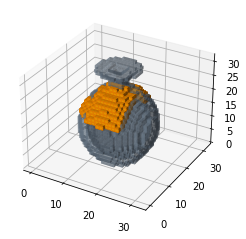

In [13]:
index = np.random.randint(0, len(train_x)-1)
mesh_fract = train_x[index]
mesh_piece = train_y[index]

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(mesh_fract, facecolors='slategray', alpha=0.5)
ax.voxels(mesh_piece, facecolors='orange', edgecolors='darkorange')
plt.show()